# Marine heatwave and biological impacts


For this notebook we will use data from Santa Barbara Coastal Long-Term Ecological Research (https://sbclter.msi.ucsb.edu/data/catalog/). The data is collected from the nearshore waters of southern California at a number of different sites, as shown below.

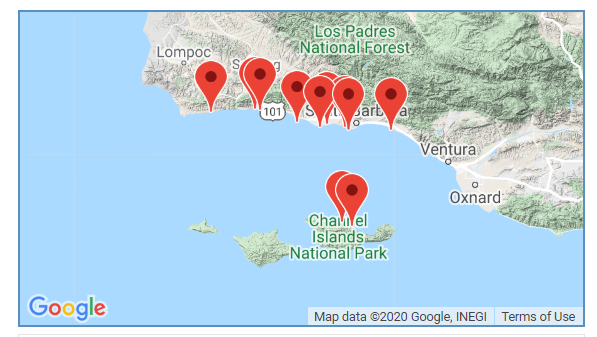

In [6]:
from path import Path

ModuleNotFoundError: No module named 'path'

In [1]:
# Load required modules.
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
from datetime import date, timedelta
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

### Enter the path where you saved the MHW tracker climatology and statistics .csv files:


In [2]:
# Only use forward slashes!
data_path = 'C:/Users/astel/Documents/GitHub/scix_mhws/data/'

### Load the MHW tracker climatology and statistics .csv files

In [4]:
# These are ranom coordinates, near some of the research site.
lat = 34.125
lon = -120.125

Load the MHW tracker climatology and statistics .csv files

In [8]:
# Only use forward slashes!
clim = pd.read_csv('data/clim_lon_{}_lat_{}.csv'.format(lon, lat))
mhws = pd.read_csv('data/event_lon_{}_lat_{}.csv'.format(lon, lat), parse_dates=[3, 4, 5, 6])
mhws.head()

,lon,lat,event_no,date_start,date_peak,date_end,duration,intensity_mean,intensity_max,intensity_cumulative
0,-119.875,34.125,1,1982-09-11,1982-09-11,1982-09-15,5,2.106,2.25,10.53
1,-119.875,34.125,2,1982-10-20,1982-10-23,1982-10-24,5,1.502,1.71,7.51
2,-119.875,34.125,3,1982-11-16,1982-11-19,1982-11-21,6,1.608,1.71,9.65
3,-119.875,34.125,4,1983-01-12,1983-01-15,1983-03-03,51,1.800,2.59,91.79
4,-119.875,34.125,5,1983-03-08,1983-03-11,1983-03-13,6,1.955,2.32,11.73


### Convert the pandas dataframe to an xarray dataset (makes things easier for us in this form).


In [10]:
# Creating a new pandas dataframe where the first column is now 'date_start'.
mhw = mhws.reset_index(level=0, drop=True)
mhw = mhws.set_index('date_start')
mhw.head()

# Converting to xarray.
mhw = mhws.to_xarray()
mhw['duration'] = mhw.duration.astype(dtype=int) # For some reason the duration wasn't loaded as numbers, so fixing that.

# Changing the coordinate to date_start (keeping the name 'index')
# This way, all MHWs are sorted into the year that they started (similar to Oliver at al. 2018)
mhw['index'] = mhw.date_start
print(mhw)

<xarray.Dataset>
Dimensions:               (index: 81)
Coordinates:
  * index                 (index) datetime64[ns] 1982-09-11 ... 2019-09-12
Data variables:
    lon                   (index) float64 -119.9 -119.9 -119.9 ... -119.9 -119.9
    lat                   (index) float64 34.12 34.12 34.12 ... 34.12 34.12
    event_no              (index) int64 1 2 3 4 5 6 7 8 ... 75 76 77 78 79 80 81
    date_start            (index) datetime64[ns] 1982-09-11 ... 2019-09-12
    date_peak             (index) datetime64[ns] 1982-09-11 ... 2019-09-13
    date_end              (index) datetime64[ns] 1982-09-15 ... 2019-09-16
    duration              (index) int32 5 5 6 51 6 6 18 65 ... 24 12 31 7 7 5 5
    intensity_mean        (index) float64 2.106 1.502 1.608 ... 1.443 2.27 2.668
    intensity_max         (index) float64 2.25 1.71 1.71 2.59 ... 1.65 2.42 3.42
    intensity_cumulative  (index) float64 10.53 7.51 9.65 ... 10.1 11.35 13.34


# The data is collected at a number of sites, enter the site you want to examine here:

Some sites to pick from are: 'ABUR', 'AQUE', 'CARP', 'IVEE', 'MOHK', 'NAPL'

Note that not all data files will have the same sites.

In [11]:
site = 'MOHK'

# Lobster abundance

For more information: https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-sbc&identifier=77&revision=newest

For information on what each column means, go to the above website - click view full metadata and the click Data Entities.

In [13]:
# Read file.
lob = pd.read_csv(data_path + 'Lobster_Abundance_All_Years_20181009.csv', parse_dates=[0, 1, 2, 3])
lob['DATE'] = pd.to_datetime(lob['DATE'], errors='coerce') # fixes a random error.
lob

,YEAR,MONTH,DATE,SITE,TRANSECT,REPLICATE,SIZE_MM,COUNT,NUM_AO,AREA
0,2012-01-01,8,2012-08-20,IVEE,1,A,-99999.0,0,0,300
1,2012-01-01,8,2012-08-20,IVEE,1,B,-99999.0,0,0,300
2,2012-01-01,8,2012-08-20,IVEE,1,C,-99999.0,0,0,300
3,2012-01-01,8,2012-08-20,IVEE,1,D,-99999.0,0,0,300
4,2012-01-01,8,2012-08-20,IVEE,2,A,-99999.0,0,0,300
...,...,...,...,...,...,...,...,...,...,...
4357,2018-01-01,8,2018-08-24,MOHK,2,D,83.0,1,0,300
4358,2018-01-01,8,2018-08-24,MOHK,2,D,84.0,1,0,300
4359,2018-01-01,8,2018-08-24,MOHK,2,D,85.0,1,0,300
4360,2018-01-01,8,2018-08-24,MOHK,2,D,86.0,1,0,300



Note that all of the coloumn names are all caps - make sure you write column names exactly as they are written.

Let's print out what sites are available:

In [14]:
print(np.unique(lob.SITE)) # There are multiples of each site written in the data so we only want to see unique values.

['AQUE' 'CARP' 'IVEE' 'MOHK' 'NAPL']


### Select the site from the data (and remove the rest)

Re-run the cells with a different site name and transect, if you would like to change it.

In [15]:
lob['SITE'] == site

0       False
1       False
2       False
3       False
4       False
        ...  
4357     True
4358     True
4359     True
4360     True
4361     True
Name: SITE, Length: 4362, dtype: bool

In [29]:
lob_site = lob[lob['SITE'] == site]
lob_site = lob_site[lob_site['TRANSECT'] == 2]
lob_site

,YEAR,MONTH,DATE,SITE,TRANSECT,REPLICATE,SIZE_MM,COUNT,NUM_AO,AREA
245,2012-01-01,8,2012-08-29,MOHK,2,A,-99999.0,0,0,300
246,2012-01-01,8,2012-08-29,MOHK,2,B,60.0,1,0,300
247,2012-01-01,8,2012-08-29,MOHK,2,B,65.0,1,0,300
248,2012-01-01,8,2012-08-29,MOHK,2,B,68.0,1,0,300
249,2012-01-01,8,2012-08-29,MOHK,2,B,75.0,1,0,300
...,...,...,...,...,...,...,...,...,...,...
4357,2018-01-01,8,2018-08-24,MOHK,2,D,83.0,1,0,300
4358,2018-01-01,8,2018-08-24,MOHK,2,D,84.0,1,0,300
4359,2018-01-01,8,2018-08-24,MOHK,2,D,85.0,1,0,300
4360,2018-01-01,8,2018-08-24,MOHK,2,D,86.0,1,0,300


Convert the bio data to the annual sum (change .sum() to .mean() at the end to get the annual mean)

In [30]:
lob_count = lob_site.COUNT.groupby(lob_site.DATE.dt.to_period('Y')).sum()
lob_count

DATE
2012     28
2013      6
2014      9
2015    157
2016     19
2017     48
2018     26
Freq: A-DEC, Name: COUNT, dtype: int64

## Let's plot a time series of lobster count 


Text(0,0.5,'Lobster count')

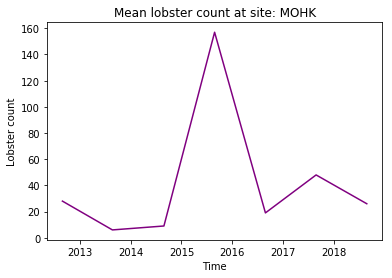

In [32]:
plt.figure()
plt.title('Mean lobster count at site: {}'.format(site))
plt.plot(np.unique(lob_site.DATE), lob_count, color='purple') # Note the US spelling of colour.
plt.xlabel('Time')
plt.ylabel('Lobster count')
# plt.savefig('SBC_lobster_count_{}.png'.format(site))

Next we need to convert the MHW statistics to annual mean/sum and make sure the data is in the same time range as the lobster data.

We need to manually select dates from the mhws start dates to match the dates where we have bio data.

I've created two types of mhw annual datasets: this is because it doesn't make sense to take the annual sum of, for example, intensity_mean (after all - isn't that just the cumulative intensity?). So while most mhw stats that we plot are the mean - for the duration we will show the annual sum. 

In [33]:
# Selected manually from above to match the year/month range of the bio data.
mhw_lob = mhw.groupby('index.year').mean()
mhw_lob_sum = mhw.groupby('index.year').sum()
print(mhw_lob)

# Manually select the years that match the lobster data. If you want to do a one year lag:
# change the year range start and end date by plus/minus one.
mhw_lob = mhw_lob.sel(year=slice('2012', '2018'))
mhw_lob_sum = mhw_lob_sum.sel(year=slice('2012', '2018'))
print(mhw_lob)

<xarray.Dataset>
Dimensions:               (year: 28)
Coordinates:
  * year                  (year) int64 1982 1983 1984 1986 ... 2017 2018 2019
Data variables:
    lon                   (year) float64 -119.9 -119.9 -119.9 ... -119.9 -119.9
    lat                   (year) float64 34.12 34.12 34.12 ... 34.12 34.12 34.12
    event_no              (year) float64 2.0 6.0 12.0 16.0 ... 72.0 75.5 80.0
    duration              (year) float64 5.333 29.2 13.71 ... 9.0 19.17 5.667
    intensity_mean        (year) float64 1.739 2.206 2.402 ... 1.859 2.012 2.127
    intensity_max         (year) float64 1.89 2.742 3.027 ... 2.54 2.583 2.497
    intensity_cumulative  (year) float64 9.23 66.14 36.21 ... 16.73 40.09 11.6
<xarray.Dataset>
Dimensions:               (year: 7)
Coordinates:
  * year                  (year) int64 2012 2013 2014 2015 2016 2017 2018
Data variables:
    lon                   (year) float64 -119.9 -119.9 -119.9 ... -119.9 -119.9
    lat                   (year) float64 34.12 

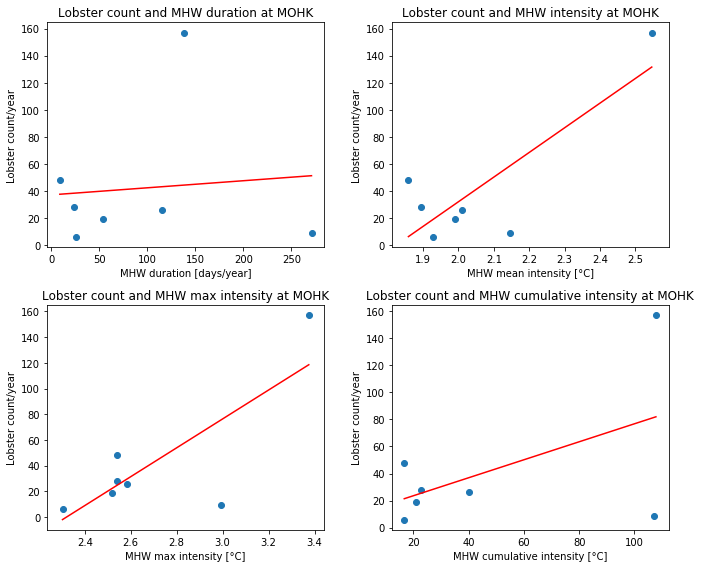

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # Creating four subplots: 2 rows, 2 columns

axs[0, 0].set_title('Lobster count and MHW duration at {}'.format(site))
axs[0, 0].scatter(mhw_lob_sum.duration, lob_count)
axs[0, 0].set_xlabel('MHW duration [days/year]')
axs[0, 0].set_ylabel('Lobster count/year')
axs[0, 0].plot(np.unique(mhw_lob_sum.duration), np.poly1d(np.polyfit(mhw_lob_sum.duration, lob_count, 1))(np.unique(mhw_lob_sum.duration)), color='red')

axs[0, 1].set_title('Lobster count and MHW intensity at {}'.format(site))
axs[0, 1].scatter(mhw_lob.intensity_mean, lob_count)
axs[0, 1].set_xlabel('MHW mean intensity [°C]')
axs[0, 1].set_ylabel('Lobster count/year')
axs[0, 1].plot(np.unique(mhw_lob.intensity_mean), np.poly1d(np.polyfit(mhw_lob.intensity_mean, lob_count, 1))(np.unique(mhw_lob.intensity_mean)), color='red')

axs[1, 0].set_title('Lobster count and MHW max intensity at {}'.format(site))
axs[1, 0].scatter(mhw_lob.intensity_max, lob_count)
axs[1, 0].set_xlabel('MHW max intensity [°C]')
axs[1, 0].set_ylabel('Lobster count/year')
axs[1, 0].plot(np.unique(mhw_lob.intensity_max), np.poly1d(np.polyfit(mhw_lob.intensity_max, lob_count, 1))(np.unique(mhw_lob.intensity_max)), color='red')

axs[1, 1].set_title('Lobster count and MHW cumulative intensity at {}'.format(site))
axs[1, 1].scatter(mhw_lob.intensity_cumulative, lob_count)
axs[1, 1].set_xlabel('MHW cumulative intensity [°C]')
axs[1, 1].set_ylabel('Lobster count/year')
axs[1, 1].plot(np.unique(mhw_lob.intensity_cumulative), np.poly1d(np.polyfit(mhw_lob.intensity_cumulative, lob_count, 1))(np.unique(mhw_lob.intensity_cumulative)), color='red')

plt.tight_layout()
# plt.savefig('SBC_lobster_count_mhw_{}.png'.format(site))

Print the results of the Pearson r test, for each MHW property.

In [36]:
print('Duration: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.duration, lob_count)))
print('intensity mean: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_mean, lob_count)))
print('intensity max: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_max, lob_count)))
print('intensity cumulative: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_cumulative, lob_count)))

Duration: R=0.33, p=0.46
intensity mean: R=0.82, p=0.02
intensity max: R=0.78, p=0.04
intensity cumulative: R=0.53, p=0.22


# Lobster size

In [38]:
lob_size = lob_site[lob_site['SIZE_MM'] != -99999.0] # Remove any -99999.0 values (means not counted anyway)
lob_size = lob_size['SIZE_MM'].groupby(lob_size['DATE'].dt.to_period('Y')).mean()
lob_size

DATE
2012    78.947368
2013    65.000000
2014    72.222222
2015    66.355932
2016    66.764706
2017    74.588235
2018    78.458333
Freq: A-DEC, Name: SIZE_MM, dtype: float64

Text(0,0.5,'Lobster size [mm]')

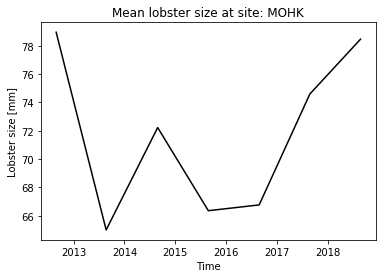

In [39]:
plt.figure()
plt.title('Mean lobster size at site: {}'.format(site))
plt.plot(np.unique(lob_site.DATE), lob_size, color='black') 
plt.xlabel('Time')
plt.ylabel('Lobster size [mm]')
# plt.savefig('SBC_lobster_size_{}.png'.format(site))

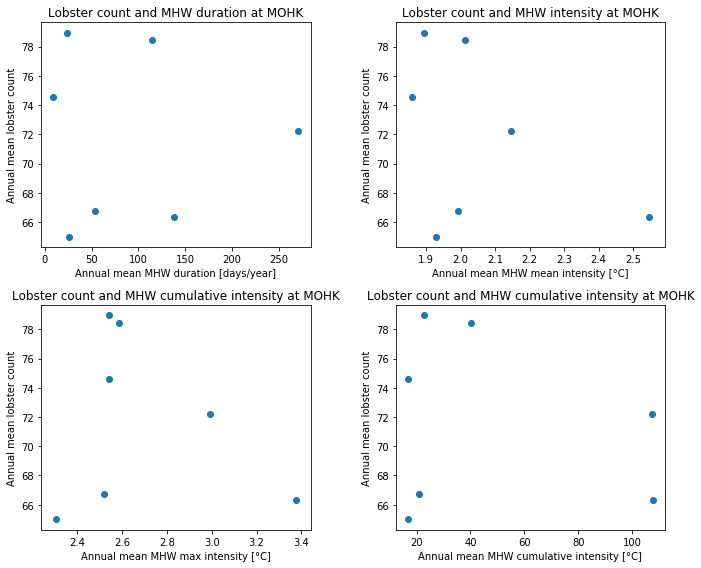

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # Creating four subplots: 2 rows, 2 columns

axs[0, 0].set_title('Lobster count and MHW duration at {}'.format(site))
axs[0, 0].scatter(mhw_lob_sum.duration, lob_size)
axs[0, 0].set_xlabel('Annual mean MHW duration [days/year]')
axs[0, 0].set_ylabel('Annual mean lobster count')
# axs[0, 0].plot(np.unique(mhw_lob_sum.duration), np.poly1d(np.polyfit(mhw_lob_sum.duration, lob_size, 1))(np.unique(mhw_lob_sum.duration)), color='red')

axs[0, 1].set_title('Lobster count and MHW intensity at {}'.format(site))
axs[0, 1].scatter(mhw_lob.intensity_mean, lob_size)
axs[0, 1].set_xlabel('Annual mean MHW mean intensity [°C]')
axs[0, 1].set_ylabel('Annual mean lobster count')
# axs[0, 1].plot(np.unique(mhw_lob.intensity_mean), np.poly1d(np.polyfit(mhw_lob.intensity_mean, lob_size, 1))(np.unique(mhw_lob.intensity_mean)), color='red')

axs[1, 0].set_title('Lobster count and MHW cumulative intensity at {}'.format(site))
axs[1, 0].scatter(mhw_lob.intensity_max, lob_size)
axs[1, 0].set_xlabel('Annual mean MHW max intensity [°C]')
axs[1, 0].set_ylabel('Annual mean lobster count')
# axs[1, 0].plot(np.unique(mhw_lob.intensity_max), np.poly1d(np.polyfit(mhw_lob.intensity_max, lob_size, 1))(np.unique(mhw_lob.intensity_max)), color='red')

axs[1, 1].set_title('Lobster count and MHW cumulative intensity at {}'.format(site))
axs[1, 1].scatter(mhw_lob.intensity_cumulative, lob_size)
axs[1, 1].set_xlabel('Annual mean MHW cumulative intensity [°C]')
axs[1, 1].set_ylabel('Annual mean lobster count')
# axs[1, 1].plot(np.unique(mhw_lob.intensity_cumulative), np.poly1d(np.polyfit(mhw_lob.intensity_cumulative, lob_size, 1))(np.unique(mhw_lob.intensity_cumulative)), color='red')

plt.tight_layout()
# plt.savefig('SBC_lobster_size_mhw_{}.png'.format(site))

In [41]:
print('Duration: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.duration, lob_size)))
print('intensity mean: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_mean, lob_size)))
print('intensity max: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_max, lob_size)))
print('intensity cumulative: R={:.2f}, p={:.2f}'.format(*stats.pearsonr(mhw_lob.intensity_cumulative, lob_size)))

Duration: R=-0.08, p=0.87
intensity mean: R=-0.42, p=0.35
intensity max: R=-0.18, p=0.70
intensity cumulative: R=-0.19, p=0.69


# Fish 

https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-sbc.17.33

In [42]:
fish = pd.read_csv(data_path + 'Monthly_Fish_All_Years_20181128.csv', parse_dates=[0, 1, 2])
fish['DATE'] = pd.to_datetime(fish['DATE'], errors='coerce') # fixes a random error.
print(fish.columns)
fish.head()

Index(['YEAR', 'MONTH', 'DATE', 'SITE', 'TRANSECT', 'VIS', 'SP_CODE', 'SIZE',
       'COUNT', 'AREA', 'SCIENTIFIC_NAME', 'COMMON_NAME', 'TAXON_KINGDOM',
       'TAXON_PHYLUM', 'TAXON_CLASS', 'TAXON_ORDER', 'TAXON_FAMILY',
       'TAXON_GENUS', 'GROUP', 'SURVEY', 'MOBILITY', 'GROWTH_MORPH'],
      dtype='object')


,YEAR,MONTH,DATE,SITE,TRANSECT,VIS,SP_CODE,SIZE,COUNT,AREA,...,TAXON_KINGDOM,TAXON_PHYLUM,TAXON_CLASS,TAXON_ORDER,TAXON_FAMILY,TAXON_GENUS,GROUP,SURVEY,MOBILITY,GROWTH_MORPH
0,2002-01-01,7,2002-07-12,ABUR,1,-99999.0,ANDA,-99999.0,-99999,80,...,Animalia,Chordata,Actinopterygii,Perciformes,Haemulidae,Anisotremus,FISH,FISH,MOBILE,SOLITARY
1,2002-01-01,7,2002-07-12,ABUR,1,-99999.0,AUFL,-99999.0,-99999,80,...,Animalia,Chordata,Actinopterygii,Gasterosteiformes,Aulorhynchidae,Aulorhynchus,FISH,FISH,MOBILE,SOLITARY
2,2002-01-01,7,2002-07-12,ABUR,1,-99999.0,BFRE,-99999.0,-99999,80,...,Animalia,Chordata,Actinopterygii,Perciformes,Embiotocidae,Brachyistius,FISH,FISH,MOBILE,SOLITARY
3,2002-01-01,7,2002-07-12,ABUR,1,-99999.0,BOTH,-99999.0,-99999,80,...,Animalia,Chordata,Actinopterygii,Pleuronectiformes,Bothidae,-99999,FISH,FISH,MOBILE,SOLITARY
4,2002-01-01,7,2002-07-12,ABUR,1,-99999.0,BRAY,-99999.0,-99999,80,...,Animalia,Chordata,Elasmobranchii,Myliobatiformes,Myliobatidae,Myliobatis,FISH,FISH,MOBILE,SOLITARY


In [44]:
# Print some info about what sites and types of fish are included.
print('Sites:', np.unique(fish.SITE))
print('Transects:', np.unique(fish.TRANSECT))
print('Species code:', np.unique(fish.SP_CODE))
print('Common name:', np.unique(fish.COMMON_NAME))
print('Taxon class:', np.unique(fish.TAXON_CLASS))
print('Taxon family:', np.unique(fish.TAXON_FAMILY))

Sites: ['ABUR' 'AQUE' 'MOHK']
Transects: [1 2 3]
Species code: ['ANDA' 'AUFL' 'BFRE' 'BOTH' 'BRAY' 'CAGG' 'CPUN' 'CSAT' 'CVEN' 'DVAC'
 'EJAC' 'ELAT' 'EMBI' 'GNIG' 'HARG' 'HCAR' 'HDEC' 'HROS' 'HRUB' 'HSEM'
 'MCAL' 'OCAL' 'OELO' 'PCAL' 'PCLA' 'PFUR' 'PLTR' 'PNEB' 'PTRY' 'RPRO'
 'RTOX' 'SATR' 'SAUR' 'SCAL' 'SCAR' 'SCAU' 'SCHR' 'SCSP' 'SFLA' 'SGUT'
 'SMAR' 'SMIN' 'SMYS' 'SPAR' 'SPAU' 'SPUL' 'SRAS' 'SSER' 'STRE' 'SYNG'
 'TSEM']
Common name: ['Barred Sandbass' 'Bat Ray' 'Black Croaker' 'Black Surfperch'
 'Black and Yellow Rockfish' 'Blacksmith' 'Blue Rockfish' 'Boccacio'
 'Brown Rockfish' 'Cabezon' 'California Halibut' 'California Scorpionfish'
 'California Sheephead' 'Copper Rockfish' 'Garibaldi' 'Giant Kelpfish'
 'Gopher Rockfish' 'Grass Rockfish' 'Halfmoon' 'Kelp Bass'
 'Kelp Greenling' 'Kelp Rockfish' 'Kelp Surfperch' 'Leopard Shark'
 'Lingcod' 'Olive Rockfish' 'Opaleye' 'Pacific Angel Shark'
 'Pacific Barracuda' 'Pile Surfperch' 'Rainbow Surfperch' 'Rock Wrasse'
 'Rubberlip Surfperch' '

In [45]:
fish_site = fish[fish['SITE'] == site]
fish_site = fish_site[fish_site['TRANSECT'] == 1]

fish_site

,YEAR,MONTH,DATE,SITE,TRANSECT,VIS,SP_CODE,SIZE,COUNT,AREA,...,TAXON_KINGDOM,TAXON_PHYLUM,TAXON_CLASS,TAXON_ORDER,TAXON_FAMILY,TAXON_GENUS,GROUP,SURVEY,MOBILITY,GROWTH_MORPH
206,2002-01-01,8,2002-08-08,MOHK,1,-99999.0,ANDA,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Perciformes,Haemulidae,Anisotremus,FISH,FISH,MOBILE,SOLITARY
207,2002-01-01,8,2002-08-08,MOHK,1,-99999.0,AUFL,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Gasterosteiformes,Aulorhynchidae,Aulorhynchus,FISH,FISH,MOBILE,SOLITARY
208,2002-01-01,8,2002-08-08,MOHK,1,-99999.0,BFRE,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Perciformes,Embiotocidae,Brachyistius,FISH,FISH,MOBILE,SOLITARY
209,2002-01-01,8,2002-08-08,MOHK,1,-99999.0,BOTH,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Pleuronectiformes,Bothidae,-99999,FISH,FISH,MOBILE,SOLITARY
210,2002-01-01,8,2002-08-08,MOHK,1,-99999.0,BRAY,-99999.0,0,80,...,Animalia,Chordata,Elasmobranchii,Myliobatiformes,Myliobatidae,Myliobatis,FISH,FISH,MOBILE,SOLITARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37272,2018-01-01,11,2018-11-02,MOHK,1,-99999.0,SRAS,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Scorpaeniformes,Sebastidae,Sebastes,FISH,FISH,MOBILE,SOLITARY
37273,2018-01-01,11,2018-11-02,MOHK,1,3.0,SSER,16.0,1,80,...,Animalia,Chordata,Actinopterygii,Scorpaeniformes,Sebastidae,Sebastes,FISH,FISH,MOBILE,SOLITARY
37274,2018-01-01,11,2018-11-02,MOHK,1,-99999.0,STRE,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Scorpaeniformes,Sebastidae,Sebastes,FISH,FISH,MOBILE,SOLITARY
37275,2018-01-01,11,2018-11-02,MOHK,1,-99999.0,SYNG,-99999.0,0,80,...,Animalia,Chordata,Actinopterygii,Syngnathiformes,Syngnathidae,Syngnathus,FISH,FISH,MOBILE,SOLITARY


In [46]:
fish_count = fish_site[fish_site['COUNT'] != -99999.0] # Remove any -99999.0 values (means not counted anyway)
fish_count = fish_count['COUNT'].groupby(fish_count['DATE'].dt.to_period('Y')).sum()
fish_count

DATE
2002     61
2003     82
2004    166
2005    264
2006    241
2007    395
2008    266
2009    408
2010    210
2011    438
2012    251
2013    404
2014    645
2015    911
2016    633
2017    664
2018    553
Freq: A-DEC, Name: COUNT, dtype: int64

# Plot a timeseries of fish count

Text(0,0.5,'Fish count')

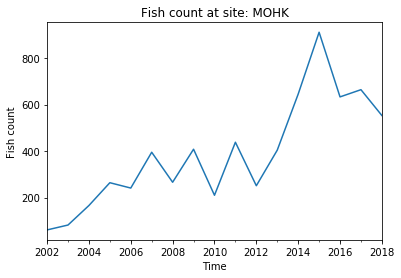

In [47]:
plt.figure()
plt.title('Fish count at site: {}'.format(site))
# The y-axis is the mean count across the transects.
fish_count.plot()
plt.xlabel('Time')
plt.ylabel('Fish count')
# plt.savefig('SBC_fish_count_{}.png'.format(site))

In [48]:
# Selected manually from above to match the year/month range of the bio data.
mhw_fish = mhw.resample(index='Y').sum()
print(mhw_fish)
mhw_fish = mhw_fish.sel(index=slice('2002', '2018')).fillna(0)
print(mhw_fish)

<xarray.Dataset>
Dimensions:               (index: 38)
Coordinates:
  * index                 (index) datetime64[ns] 1982-12-31 ... 2019-12-31
Data variables:
    lon                   (index) float64 -359.6 -599.4 -839.1 ... -719.2 -359.6
    lat                   (index) float64 102.4 170.6 238.9 ... 204.8 102.4
    event_no              (index) float64 6.0 30.0 84.0 nan ... 72.0 453.0 240.0
    duration              (index) float64 16.0 146.0 96.0 nan ... 9.0 115.0 17.0
    intensity_mean        (index) float64 5.216 11.03 16.81 ... 12.07 6.381
    intensity_max         (index) float64 5.67 13.71 21.19 ... 2.54 15.5 7.49
    intensity_cumulative  (index) float64 27.69 330.7 253.5 ... 240.5 34.79
<xarray.Dataset>
Dimensions:               (index: 17)
Coordinates:
  * index                 (index) datetime64[ns] 2002-12-31 ... 2018-12-31
Data variables:
    lon                   (index) float64 0.0 -119.9 -119.9 ... -119.9 -719.2
    lat                   (index) float64 0.0 34.12 34.

## Scatter plot: annual mean fish count and MHW days/year

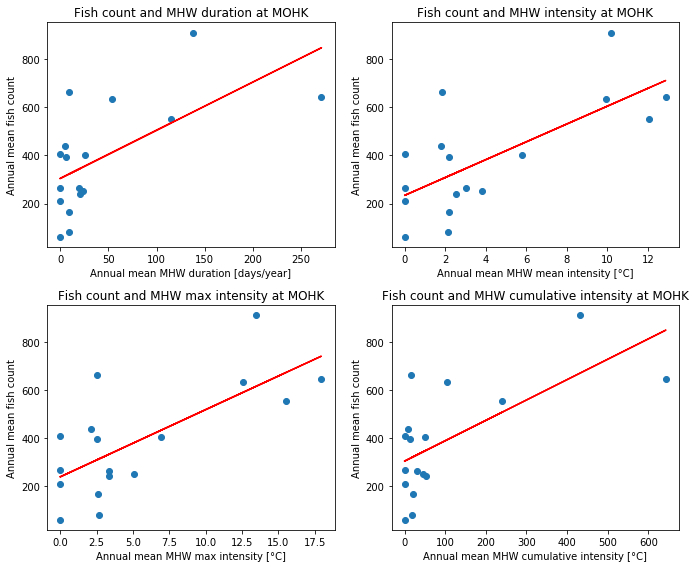

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # Creating four subplots: 2 rows, 2 columns

axs[0, 0].set_title('Fish count and MHW duration at {}'.format(site))
axs[0, 0].scatter(mhw_fish.duration, fish_count)
axs[0, 0].set_xlabel('Annual mean MHW duration [days/year]')
axs[0, 0].set_ylabel('Annual mean fish count')
axs[0, 0].plot(mhw_fish.duration, np.poly1d(np.polyfit(mhw_fish.duration, fish_count, 1))(mhw_fish.duration), color='red')

axs[0, 1].set_title('Fish count and MHW intensity at {}'.format(site))
axs[0, 1].scatter(mhw_fish.intensity_mean, fish_count)
axs[0, 1].set_xlabel('Annual mean MHW mean intensity [°C]')
axs[0, 1].set_ylabel('Annual mean fish count')
axs[0, 1].plot(mhw_fish.intensity_mean, np.poly1d(np.polyfit(mhw_fish.intensity_mean, fish_count, 1))(mhw_fish.intensity_mean), color='red')

axs[1, 0].set_title('Fish count and MHW max intensity at {}'.format(site))
axs[1, 0].scatter(mhw_fish.intensity_max, fish_count)
axs[1, 0].set_xlabel('Annual mean MHW max intensity [°C]')
axs[1, 0].set_ylabel('Annual mean fish count')
axs[1, 0].plot(mhw_fish.intensity_max, np.poly1d(np.polyfit(mhw_fish.intensity_max, fish_count, 1))(mhw_fish.intensity_max), color='red')

axs[1, 1].set_title('Fish count and MHW cumulative intensity at {}'.format(site))
axs[1, 1].scatter(mhw_fish.intensity_cumulative, fish_count)
axs[1, 1].set_xlabel('Annual mean MHW cumulative intensity [°C]')
axs[1, 1].set_ylabel('Annual mean fish count')
axs[1, 1].plot(mhw_fish.intensity_cumulative, np.poly1d(np.polyfit(mhw_fish.intensity_cumulative, fish_count, 1))(mhw_fish.intensity_cumulative), color='red')

plt.tight_layout()

# Kelp / biomass / otter sightings

In [ ]:
kelp = pd.read_csv(data_path + 'Annual_Kelp_All_Years_20181127.csv', parse_dates=[0, 1, 2])
otter = pd.read_csv(data_path + 'Sea_Otter_Abundance_20190114.csv', parse_dates=[0, 1, 2])
bio = pd.read_csv(data_path + 'Annual_All_Species_Biomass_at_transect_20181127.csv', parse_dates=[0, 1, 2])